In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import config

import plotting_helpers as plots
import utility_functions as utils
from widget_helpers import dim_select, csd_select, kcsd_select

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Select dimensions of your setup
dim_select

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
# Select a type of CSD source
csd_select

Widget Javascript not detected.  It may not be installed or enabled properly.


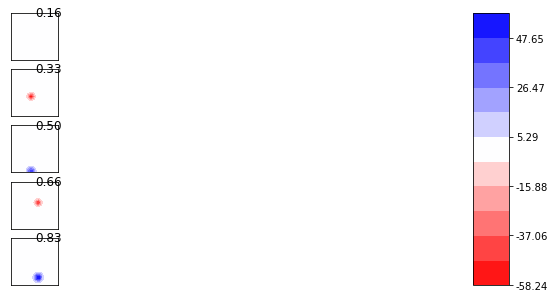

In [17]:
csd_at, true_csd = utils.generate_csd(config.csd_profile, seed=2)
plots.show_csd(csd_at, true_csd)

('Shape of the ele_pos array: ', (125, 3))
('Number of electrodes: ', 125)


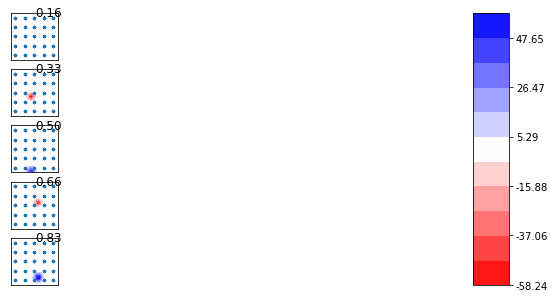

In [18]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
num_ele, ele_pos = utils.generate_electrodes()
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

In [6]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation
#ele_seed = np.random.RandomState(13)
#ele_fail = ele_seed.choice(num_ele, 3, replace=False)
#ele_pos_new = np.delete(ele_pos, ele_fail, axis=0)
#plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
#print('Shape of the ele_pos array: ', ele_pos.shape)
#print('Number of electrodes: ',ele_pos.shape[0])

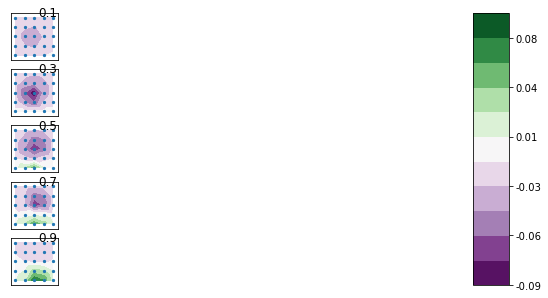

In [19]:
# Lets compute the potential recorded by these electrodes due to the CSD
h = 10.
sigma = 1.
pots = utils.calculate_potential(csd_at, true_csd, ele_pos, h, sigma)
plots.show_pot(ele_pos, pots)

In [15]:
#Select kCSD method
kcsd_select

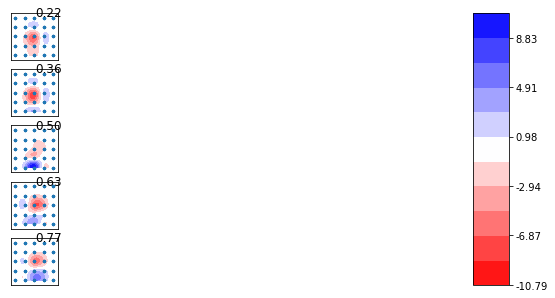

In [20]:
####TODO temporal illustration here
#Lets do KCSD!
k = config.kCSD(ele_pos, pots) 
est_csd = k.values()[:,...,0]
est_pos = k.estm_pos
plots.show_csd(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

('Cross validating R (all lambda) :', 0.10000000000000001)
('Cross validating R (all lambda) :', 0.11)
('Cross validating R (all lambda) :', 0.12)
('Cross validating R (all lambda) :', 0.13)
('Cross validating R (all lambda) :', 0.13999999999999999)
('Cross validating R (all lambda) :', 0.14999999999999997)
('Cross validating R (all lambda) :', 0.15999999999999998)
('Cross validating R (all lambda) :', 0.16999999999999998)
('Cross validating R (all lambda) :', 0.17999999999999997)
('Cross validating R (all lambda) :', 0.18999999999999995)
('Cross validating R (all lambda) :', 0.19999999999999996)
('Cross validating R (all lambda) :', 0.20999999999999996)
('Cross validating R (all lambda) :', 0.21999999999999995)
('Cross validating R (all lambda) :', 0.22999999999999995)
('Cross validating R (all lambda) :', 0.23999999999999994)
('R, lambda :', 0.13999999999999999, 2.5808615404180662e-16)


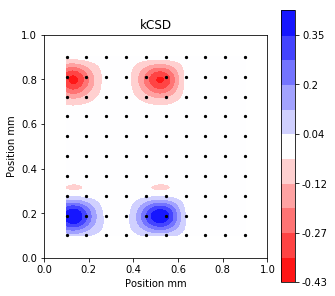

In [16]:
k.cross_validate(Rs=np.arange(0.10, 0.25, 0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()[:,...,0]
plots.show_csd(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)